SVR-> Support Vector Regression

Import the important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the dataset

In [4]:
dataset = pd.read_csv("Position_Salaries.csv")
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [7]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [9]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training the SVR model on the whole dataset

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result

In [12]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Visualising the SVR results

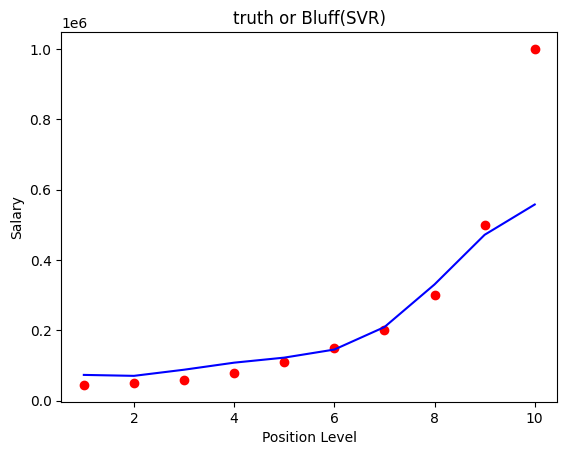

In [13]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color = "red")
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)),color = "blue")
plt.title("truth or Bluff(SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

Visualising the SVR Results(for higher resolution and smoother curve)


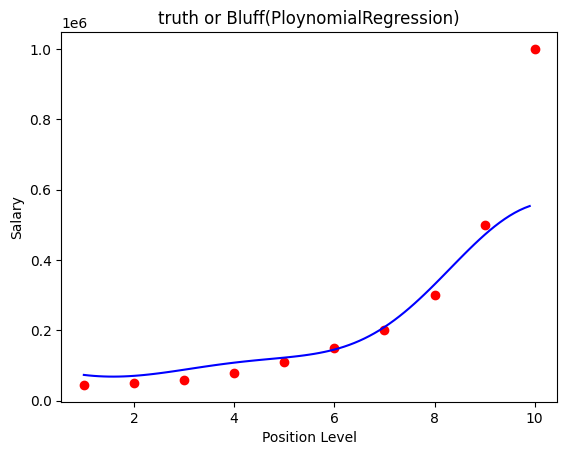

In [16]:
x_grid = np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(x)),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = "red")
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)),color = "blue")
plt.title("truth or Bluff(PloynomialRegression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()